In [22]:
import pandas as pd
import os

In [23]:
weather_data = pd.read_csv('weather_timeseries.csv')

In [24]:
#weather_data = weather_data.drop(weather_data.columns[0],axis=1)

In [25]:
covid_data = pd.read_csv('covid_data/covid_19_data.csv')

In [26]:
US_covid_data = covid_data[covid_data['Country/Region']=='US']

In [27]:
US_covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,71,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
119,120,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
120,121,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
161,162,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285273,285274,05/02/2021,Virginia,US,2021-05-03 04:20:39,661314.0,10791.0,0.0
285283,285284,05/02/2021,Washington,US,2021-05-03 04:20:39,404709.0,5499.0,0.0
285286,285287,05/02/2021,West Virginia,US,2021-05-03 04:20:39,153918.0,2686.0,0.0
285288,285289,05/02/2021,Wisconsin,US,2021-05-03 04:20:39,661685.0,7567.0,0.0


In [28]:
US_weather_data = weather_data[weather_data['location'].isin(US_covid_data['Province/State'])]
US_covid_data = US_covid_data[US_covid_data['Province/State'].isin(weather_data['location'])]


In [29]:
US_weather_data[US_weather_data['location']=='Kentucky']
US_weather_data.describe()

,Average Temperature (deg F)
count,14929.000000
mean,53.972169
std,17.539477
min,-13.304688
25%,40.500000
50%,55.281250
75%,68.833333
max,88.680541


In [30]:
type(US_weather_data.iloc[0]['date'])

str

In [31]:
type(US_covid_data.iloc[0]['ObservationDate'])

str

In [32]:
US_weather_data['date'] = pd.to_datetime(US_weather_data['date'])

In [33]:
US_weather_data[US_weather_data['location']=='Kentucky'].groupby('date').mean()

,Average Temperature (deg F)
date,
2020-02-01,40.500000
2020-02-02,47.857143
2020-02-03,57.928571
2020-02-04,55.928571
2020-02-05,41.500000
...,...
2020-12-27,41.133333
2020-12-28,43.533333
2020-12-29,33.666667


In [34]:
US_covid_data['ObservationDate'] = pd.to_datetime(US_covid_data['ObservationDate'])

C:\Users\tango\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
US_weather_data = US_weather_data[US_weather_data['date'].isin(US_covid_data['ObservationDate'])]
US_covid_data = US_covid_data[US_covid_data['ObservationDate'].isin(weather_data['date'])]

In [36]:
US_covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,71,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0
119,120,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0
161,162,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0
162,163,2020-01-25,Illinois,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
192088,192089,2020-12-31,Virginia,US,2021-04-02 15:13:53,349584.0,5032.0,0.0
192097,192098,2020-12-31,Washington,US,2021-04-02 15:13:53,246752.0,3461.0,0.0
192100,192101,2020-12-31,West Virginia,US,2021-04-02 15:13:53,85334.0,1338.0,0.0
192102,192103,2020-12-31,Wisconsin,US,2021-04-02 15:13:53,520438.0,5242.0,0.0


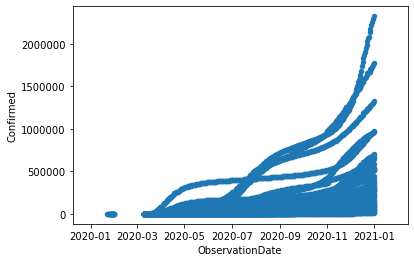

In [37]:
US_covid_data.plot(x='ObservationDate',y='Confirmed',kind='scatter')

In [38]:
US_weather_data_avg = US_weather_data.groupby(['date','location']).mean()
print(US_weather_data)

            date  Average Temperature (deg F) location     fids
38    2020-03-10                    61.769231  Alabama  FIPS:01
39    2020-03-11                    63.076923  Alabama  FIPS:01
40    2020-03-12                    67.384615  Alabama  FIPS:01
41    2020-03-13                    66.538462  Alabama  FIPS:01
42    2020-03-14                    66.153846  Alabama  FIPS:01
...          ...                          ...      ...      ...
14924 2020-12-25                    27.888889  Wyoming  FIPS:56
14925 2020-12-26                    29.411765  Wyoming  FIPS:56
14926 2020-12-27                    21.461538  Wyoming  FIPS:56
14927 2020-12-30                    14.727273  Wyoming  FIPS:56
14928 2020-12-31                    23.466667  Wyoming  FIPS:56

[13006 rows x 4 columns]


In [39]:
US_weather_data_avg

Average Temperature (deg F)
date       location                                  
2020-01-22 California                       44.860450
           Colorado                         25.578295
           Illinois                         27.980000
           Kansas                           36.720000
           Michigan                         27.637647
...                                               ...
2020-12-31 Virginia                         48.800000
           Washington                       37.500000
           West Virginia                    43.600000
           Wisconsin                        19.240000
           Wyoming                          23.466667

[13006 rows x 1 columns]

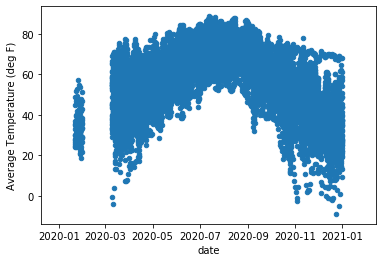

In [40]:
US_weather_data_avg.reset_index().plot(x='date',y='Average Temperature (deg F)',kind='scatter')

In [41]:
US_weather_data.to_csv('clean_weather_data.csv')
US_covid_data.to_csv('clean_covid_data.csv')

In [42]:
#[TODO]: Get data for remaining 17 states/districts